In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()


## Loading the Raw Data

In [65]:
data_raw = pd.read_csv('1.04. Real-life example.csv')
data_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variable

In [66]:
data_raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Dealing with missing values

In [68]:
data_raw.count()

Brand           4345
Price           4173
Body            4345
Mileage         4345
EngineV         4195
Engine Type     4345
Registration    4345
Year            4345
Model           4345
dtype: int64

In [69]:
data_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [70]:
data_first = data_raw.dropna()
data_first.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Exploring  the PDF

C:\Users\user\AppData\Local\Temp\ipykernel_14328\2202536082.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_first['Price'])


<Axes: xlabel='Price', ylabel='Density'>

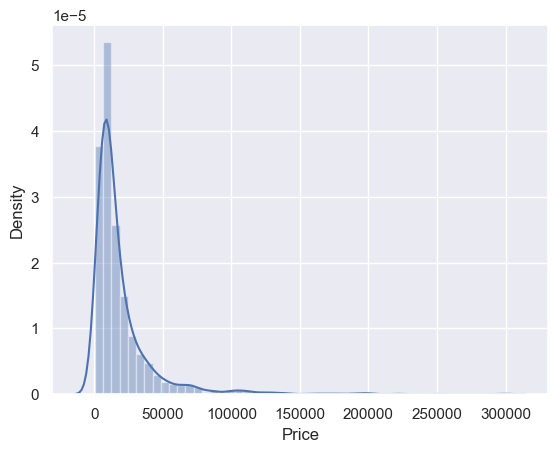

In [72]:
sns.distplot(data_first['Price'])

C:\Users\user\AppData\Local\Temp\ipykernel_14328\1959488771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_first['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

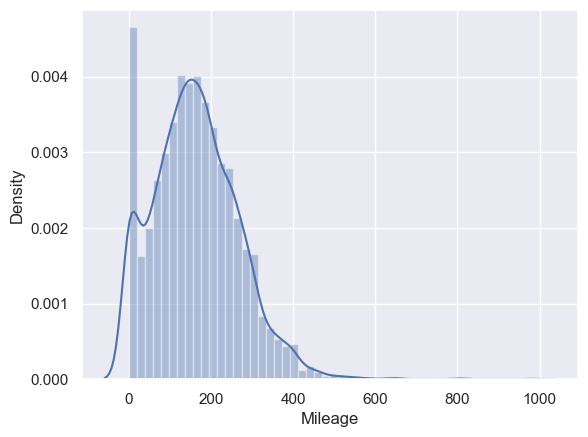

In [73]:
sns.distplot(data_first['Mileage'])

C:\Users\user\AppData\Local\Temp\ipykernel_14328\1053218660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_first['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

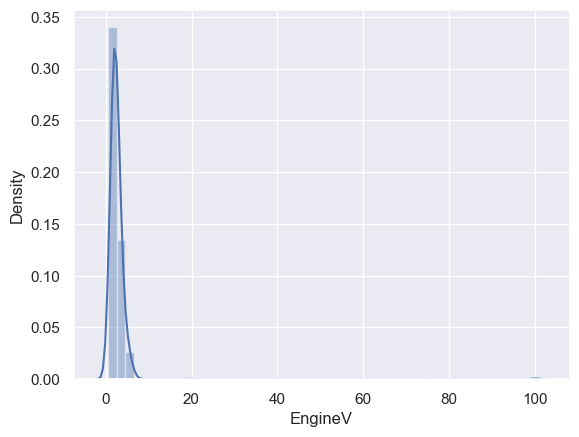

In [74]:
sns.distplot(data_first['EngineV'])

C:\Users\user\AppData\Local\Temp\ipykernel_14328\3348331677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_first['Year'])


<Axes: xlabel='Year', ylabel='Density'>

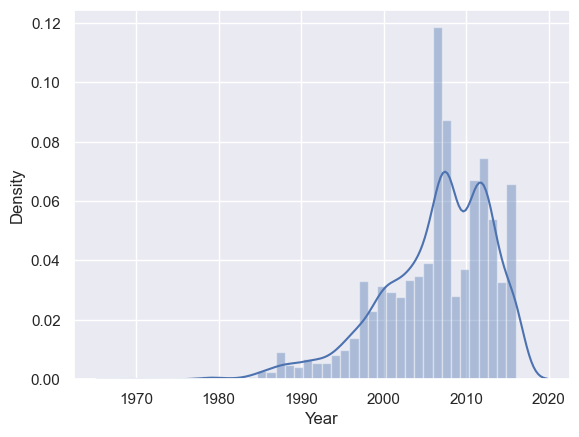

In [75]:
sns.distplot(data_first['Year'])

## Dealing with outlier

In [77]:
q = data_first['Price'].quantile(0.98)
q

103999.0

In [78]:
data_first = data_first[data_first['Price']<q]
data_first.describe()

,Price,Mileage,EngineV,Year
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,16840.689820,166.739538,2.738415,2006.197312
std,16332.966734,102.042365,4.980975,6.640292
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,95.000000,1.800000,2002.000000
50%,11250.000000,160.000000,2.200000,2007.000000
75%,20800.000000,230.000000,3.000000,2011.000000
max,103333.000000,980.000000,99.990000,2016.000000


In [79]:
q = data_first['Mileage'].quantile(0.98)
q

400.0

In [82]:
data_first = data_first[data_first['Mileage']<q]
data_first.describe()

,Price,Mileage,EngineV,Year
count,3855.000000,3855.000000,3855.000000,3855.000000
mean,17078.953038,160.038911,2.747152,2006.439170
std,16389.634611,91.791505,5.036151,6.453046
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,94.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21000.000000,225.000000,3.000000,2011.000000
max,103333.000000,396.000000,99.990000,2016.000000


In [91]:
q = data_first['Year'].quantile(0.03)
q

1991.0

In [93]:
data_first = data_first[data_first['Year']>q]
data_first.describe()

,Price,Mileage,EngineV,Year
count,3729.000000,3729.000000,3729.000000,3729.000000
mean,17548.091207,157.876374,2.744403,2007.077233
std,16450.945465,89.939310,4.863936,5.495554
min,800.000000,0.000000,0.600000,1992.000000
25%,7500.000000,93.000000,1.800000,2003.000000
50%,11800.000000,156.000000,2.200000,2008.000000
75%,21500.000000,220.000000,3.000000,2012.000000
max,103333.000000,396.000000,99.990000,2016.000000


In [96]:
data_no_ol = data_first[data_first['EngineV']<6.5]
data_no_ol.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3707,3707.000000,3707,3707.000000,3707.000000,3707,3707,3707.000000,3707
unique,7,NaN,6,NaN,NaN,4,2,NaN,278
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,821,NaN,1379,NaN,NaN,1738,3353,NaN,172
mean,NaN,17599.300272,NaN,157.667656,2.448945,NaN,NaN,2007.093607,NaN
std,NaN,16475.739321,NaN,89.943687,0.956449,NaN,NaN,5.492784,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1992.000000,NaN
25%,NaN,7500.000000,NaN,92.500000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11900.000000,NaN,156.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21650.000000,NaN,220.000000,3.000000,NaN,NaN,2012.000000,NaN


## Checking OLS Assumption

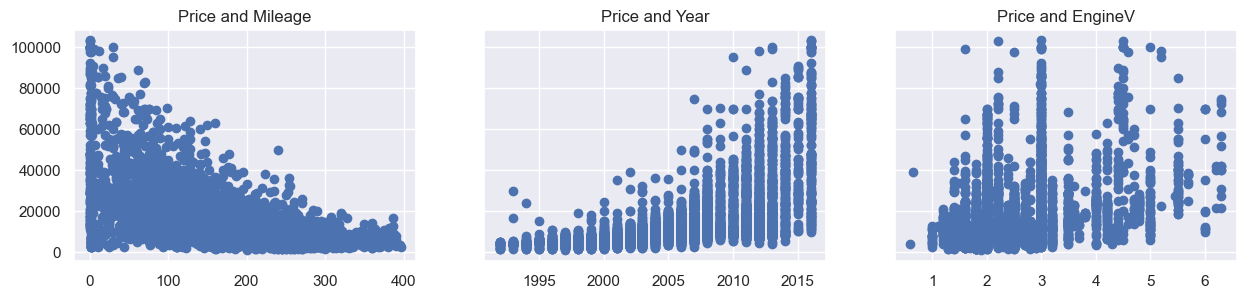

In [120]:
#Linearity

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize =(15,3),sharey=True)
ax1.scatter(data_no_ol['Mileage'],data_no_ol['Price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data_no_ol['Year'],data_no_ol['Price'])
ax2.set_title('Price and Year')
ax3.scatter(data_no_ol['EngineV'],data_no_ol['Price'])
ax3.set_title('Price and EngineV')

plt.show()

## Relaxing the assumption

In [122]:
data_no_ol['Price'] = np.log(data_no_ol['Price'])

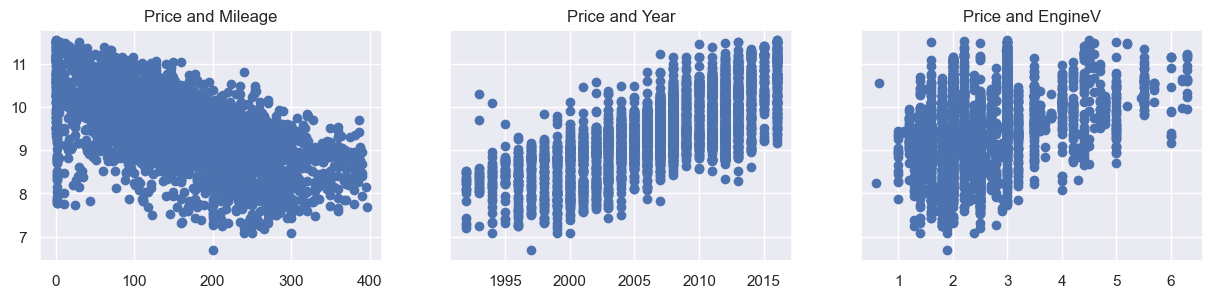

In [224]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize =(15,3),sharey=True)
ax1.scatter(data_no_ol['Mileage'],data_no_ol['Price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data_no_ol['Year'],data_no_ol['Price'])
ax2.set_title('Price and Year')
ax3.scatter(data_no_ol['EngineV'],data_no_ol['Price'])
ax3.set_title('Price and EngineV')

plt.show()

In [223]:
data_no_ol = data_no_ol.rename({'Price':'Log_price'})
data_no_ol.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'], dtype=object)

## MultiCollinearity
#### VIF

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_no_ol[['Mileage','Year','EngineV']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Variables'] = variables.columns
vif

,VIF,Variables
0,4.049487,Mileage
1,10.322234,Year
2,7.558274,EngineV


In [134]:
# More than 10 means drop 
data_vif = data_no_ol.drop(columns = 'Year')
data_vif

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model
2,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes,S 500
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,Q7
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,Rav 4
7,Audi,9.560997,vagon,200,2.7,Diesel,yes,A6
8,Renault,9.287209,vagon,193,1.5,Diesel,yes,Megane
...,...,...,...,...,...,...,...,...
4337,Renault,8.824678,sedan,152,1.6,Petrol,yes,Megane
4338,Volkswagen,9.350102,van,163,2.5,Diesel,yes,T5 (Transporter)
4339,Toyota,9.792556,sedan,35,1.6,Petrol,yes,Corolla
4341,BMW,8.779557,sedan,1,3.5,Petrol,yes,535


### Dropping model column

In [243]:
data_deletemodel = data_dropmodel.drop(columns=['Model'])
data_deletemodel.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
count,3633,3633.000000,3633,3633.000000,3633.000000,3633,3633
unique,7,NaN,6,NaN,NaN,4,2
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes
freq,817,NaN,1362,NaN,NaN,1718,3283
mean,NaN,9.428255,NaN,158.137352,2.442045,NaN,NaN
std,NaN,0.827194,NaN,89.823831,0.946744,NaN,NaN
min,NaN,6.684612,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,8.922658,NaN,93.000000,1.800000,NaN,NaN
50%,NaN,9.375855,NaN,156.000000,2.200000,NaN,NaN
75%,NaN,9.975808,NaN,220.000000,3.000000,NaN,NaN


## Create dummy variables for categorical columns

In [255]:
data_with_dummies = pd.get_dummies(data_deletemodel, drop_first=True,dtype=int)

In [256]:
data_with_dummies.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [257]:
data_with_dummies.columns

Index(['Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

### Checking VIF once again

In [258]:
variables = data_with_dummies[data_with_dummies.columns[1:]]


vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Variables'] = variables.columns
vif

,VIF,Variables
0,4.852038,Mileage
1,8.016063,EngineV
2,2.269169,Brand_BMW
3,2.736927,Brand_Mercedes-Benz
4,1.653733,Brand_Mitsubishi
5,2.133455,Brand_Renault
6,2.188704,Brand_Toyota
7,2.877837,Brand_Volkswagen
8,1.462918,Body_hatch
9,1.516866,Body_other


In [261]:
data_preprocessed = data_with_dummies[data_with_dummies.columns]

## Linear Regression Model

### Declare inputs and targets

In [262]:
targets = data_preprocessed['Price']
inputs = data_preprocessed[data_with_dummies.columns[1:]]

### Scale the data

In [264]:
from sklearn.preprocessing import StandardScaler

In [265]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [266]:
inputs_scaled = scaler.transform(inputs)

### Train test split

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Create Regression

In [272]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Check output of the regression

In [274]:
y_trhat = reg.predict(x_train)

(6.0, 12.0)

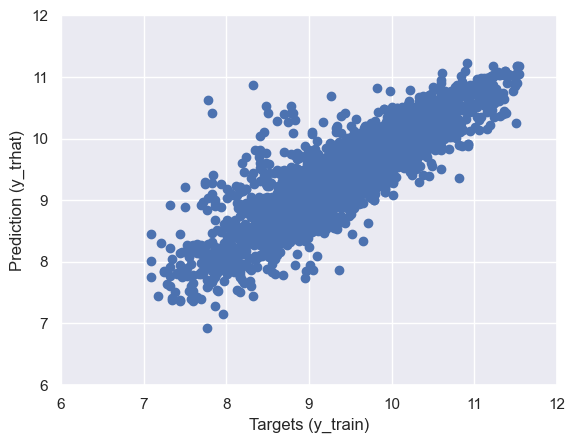

In [276]:
plt.scatter(y_train,y_trhat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_trhat)')

plt.xlim(6,12)
plt.ylim(6,12)


In [277]:
# Check residual plot

C:\Users\user\AppData\Local\Temp\ipykernel_14328\3047029943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_trhat)


<Axes: xlabel='Price', ylabel='Density'>

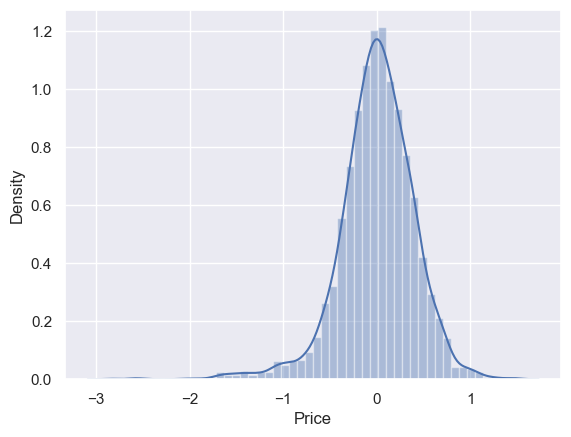

In [278]:
sns.distplot(y_train - y_trhat)

In [279]:
# Fiding r-score of model
reg.score(x_train,y_train)

0.7630042822548481

### Finding weight and bias

In [281]:
reg.intercept_

9.43051500414291

In [283]:
coeff = pd.DataFrame()

coeff['Features'] = data_preprocessed.columns[1:]
coeff['Weight'] = reg.coef_

coeff

,Features,Weight
0,Mileage,-0.414674
1,EngineV,0.205686
2,Brand_BMW,0.019750
3,Brand_Mercedes-Benz,0.000625
4,Brand_Mitsubishi,-0.139428
5,Brand_Renault,-0.180724
6,Brand_Toyota,-0.063199
7,Brand_Volkswagen,-0.085026
8,Body_hatch,-0.142965
9,Body_other,-0.095909


## Testing

In [284]:
y_tehat = reg.predict(x_test)

(6.0, 12.0)

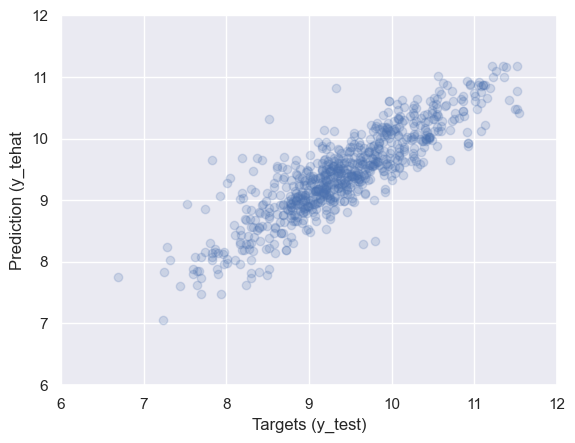

In [287]:
plt.scatter(y_test,y_tehat, alpha= 0.2)

plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_tehat')

plt.xlim(6,12)
plt.ylim(6,12)


### Manual check prediction

In [291]:
df_pf = pd.DataFrame()
df_pf['Prediction'] = np.exp(y_tehat)

In [306]:
y_test = y_test().drop(columns='index')

df_pf['Targets'] = np.exp(y_test)
df_pf

,Prediction,Targets
0,20777.284491,18900.0
1,6673.103495,4999.0
2,30257.095294,4999.0
3,6548.344484,7900.0
4,11087.450742,9999.0
...,...,...
722,10990.337780,7600.0
723,18105.548621,12850.0
724,13138.711373,12400.0
725,7241.980276,9900.0


In [308]:
df_pf['Residual'] = df_pf['Prediction'] - df_pf['Targets']

In [311]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf.sort_values(by = ['Difference%'], ascending = False)

,Prediction,Targets,Residual,Difference%
264,15519.216272,2500.0,13019.216272,520.768651
2,30257.095294,4999.0,25258.095294,505.262958
472,49813.783751,11200.0,38613.783751,344.765926
462,16001.973790,3600.0,12401.973790,344.499272
60,7638.636859,1850.0,5788.636859,312.899290
...,...,...,...,...
243,12666.261693,12700.0,-33.738307,0.265656
381,18047.116193,18000.0,47.116193,0.261757
132,28408.927144,28350.0,58.927144,0.207856
438,32464.581774,32400.0,64.581774,0.199326


In [312]:
df_pf.describe()

,Prediction,Targets,Residual,Difference%
count,727.000000,727.000000,727.000000,727.000000
mean,15845.541269,17203.703453,-1358.162184,33.764201
std,11904.754375,16242.953257,8831.777110,46.540092
min,1159.051371,800.000000,-69514.053386,0.175909
25%,8073.749457,7350.000000,-3104.585459,11.851257
50%,12282.728496,11550.000000,-41.639436,22.995628
75%,19567.861260,20948.120000,2420.214813,38.703964
max,71610.377763,102800.000000,38613.783751,520.768651
